# Model Selection 

The objective of this notebook is to build a very first ent to end Machine Learning model to predict the probability of a patient being discharged on a particular day.

We'll use the dataset generated by the `dataset` job of the ETL folder. 

At this instance, the focus won't be on model performance but rather on understanding the value potential of the available data and the speedness of the solution.

In [1]:
%cd /Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital

/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital


In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt   
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from thesis_lib.utils import * 
from thesis_lib.modelling.data import *
from thesis_lib.modelling.model import *

In [3]:
data = Data().load('data/hospital_dataset')
variables = data.get_variables_dict()
data.get_stats()

Loading dataset:  hospital_train_data.parquet
Loading dataset:  hospital_val_data.parquet
Loading dataset:  hospital_test_data.parquet


dataset_type,train,val,test
n_observations,319150,33482,33309
relative_size,0.82694,0.0867542,0.0863059
n_cols,71,71,71
positives,42697,4555,4507
negatives,276453,28927,28802
positive_prop,0.133783,0.136043,0.135309
negative_prop,0.866217,0.863957,0.864691
min_date,2017-01-01,2018-11-11,2018-11-11
max_date,2018-11-10,2019-11-11,2019-11-11


In [4]:
categorical_features = [
 'images_requester_roles',
 'images_study_types',
 'labos_requester_roles',
 'sectors_last_sector',
 'sectors_names',
 'surgeries_actual',
 'surgeries_anesthesia_types',
 'surgeries_bact_positive',
 'surgeries_injury_condition',
 'surgeries_post_surgery_condition',
 'surgeries_scheduled',
 'surgeries_scheduled_done',
 'surgeries_services',
 'surgeries_types',
 'gender',
 'insurance_entity',
 'entity_group',
 'origin',
 'admission_sector',
 'isolation',
 'presumptive_dianogsis',
 'responsible_sector',
 'ARM_TEP',
 'CEC_TEP',
 'request_origin',
 'request',
 'request_diagnosis',
 'request_sector']
numerical_features = ['hosp_day_number',
 'images_count',
 'images_cumulative',
 'images_emergencies',
 'images_requester_roles_count',
 'images_requesters_count',
 'images_study_types_count',
 'labos_count',
 'labos_cumulative',
 'labos_emergencies',
 'labos_requester_roles_count',
 'labos_requesters_count',
 'labos_set_count',
 'labos_set_cumulative',
 'sectors_count',
 'surgeries_count',
 'surgeries_cumulative',
 'surgeries_post_surgery_duration',
 'surgeries_pre_surgery_duration',
 'surgeries_prep_duration',
 'surgeries_services_count',
 'surgeries_surgery_delay',
 'surgeries_surgery_duration',
 'surgeries_types_count',
 'emergency_service',
 'new_born_weight',
 'new_born_gestation_age',
 'PIM2TEP',
 'high_risk_TEP',
 'low_risk_TEP',
 'patient_age']

In [5]:
model_params = {'classifier': 'random_forest',
               'accepts_sparse': True,
                'categorical_features' : categorical_features ,
                'numerical_features' : numerical_features}

In [6]:
rf_extra_features = Model(**model_params)
rf_extra_features.transform(data)

Fitting pipeline...
Transforming data...


### Baseline

In [7]:
%%time
import time
start = time.time()
rf_extra_features.fit_classifier()
end = time.time()

Training classifier


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training_set's auc: 0.804721	validation_set's auc: 0.797199
[20]	training_set's auc: 0.805437	validation_set's auc: 0.797757
[30]	training_set's auc: 0.805604	validation_set's auc: 0.79806
[40]	training_set's auc: 0.805533	validation_set's auc: 0.797988
[50]	training_set's auc: 0.805937	validation_set's auc: 0.798413
[60]	training_set's auc: 0.806107	validation_set's auc: 0.798903
[70]	training_set's auc: 0.806424	validation_set's auc: 0.799028
[80]	training_set's auc: 0.806297	validation_set's auc: 0.798909
[90]	training_set's auc: 0.806136	validation_set's auc: 0.798775
[100]	training_set's auc: 0.806209	validation_set's auc: 0.798674
CPU times: user 45.7 s, sys: 676 ms, total: 46.4 s
Wall time: 14.6 s


In [8]:
end-start

14.630125045776367

In [9]:
rf_extra_features.n_features

26722

In [16]:
import csv

#File to save first results
out_file = 'experiments/output.csv'
#of_connection = open(out_file, 'w')
#writer = csv.writer(of_connection)

#Write the headers to the file
#writer.writerow(['experiment_set', 'model_version', 'algorithm', 'n_features', 'training_time',
#                'training_auc_roc','validation_auc_roc', 'overfitting'])
#of_connection.close()

In [12]:
perf = rf_extra_features.get_performance_metrics()

training AUC ROC score:  0.8062085462514605
validation AUC ROC score:  0.7986741711800593
relative over-fitting:  0.00934544182945338


In [13]:
perf

{'auc_training': 0.8062085462514605,
 'auc_validation': 0.7986741711800593,
 'overfitting': 0.00934544182945338}

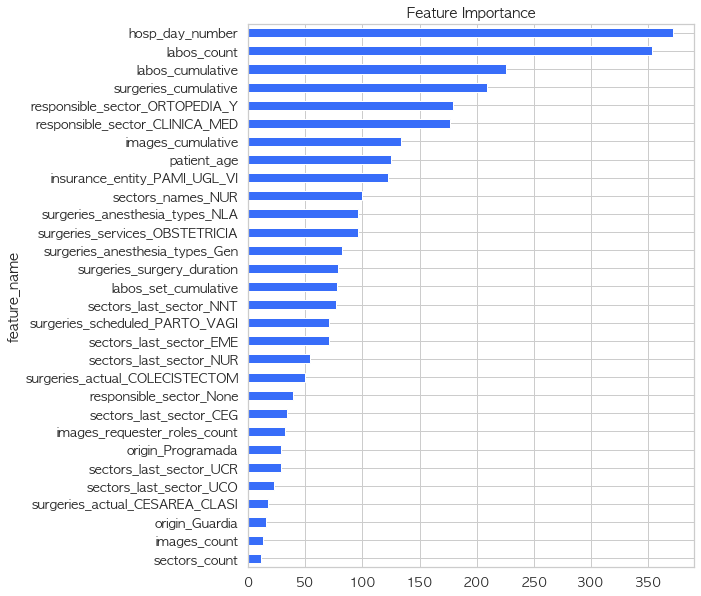

In [10]:
import seaborn as sns
sns.set(style="whitegrid",font_scale=1.2,font='AppleGothic', palette="rainbow")

rf_extra_features.plot_feature_importance()

In [17]:
# Write to the csv file ('a' means append)
of_connection = open(out_file, 'a')
writer = csv.writer(of_connection)
writer.writerow([2, 
                 'extra_features', 
                 'rf', 
                 rf_extra_features.n_features,
                 end-start,
                 perf['auc_training'],
                 perf['auc_validation'],
                 perf['overfitting']
                ])
of_connection.close()